1.Denote event A as three or fewer were born on Monday. $\mathbb{P}(A)=(\frac{6}{7})^{15}+C_{15}^1\frac{1}{7}(\frac{6}{7})^{14}+C_{15}^2(\frac{1}{7})^2(\frac{6}{7})^{13}+C_{15}^3(\frac{1}{7})^3(\frac{6}{7})^{12} = \frac{263*6^{12}}{7^{14}}$.     
Denote event B as four or more were born on a Tuesday. Since event B happens with the same probability as the complementary event of A, we have $\mathbb{P}(B) = 1-\mathbb{P}(A) = 1-\frac{263*6^{12}}{7^{14}}$.

2.$\mathbb{P}(X>58.37) = \mathbb{P}(\frac{X-\mu}{\sigma}>\frac{58.37-\mu}{\sigma}) = 1-\phi(\frac{58.37-\mu}{\sigma})=0.02$;
$\mathbb{P}(X<40.85) = \mathbb{P}(\frac{X-\mu}{\sigma}<\frac{40.85-\mu}{\sigma}) = \phi(\frac{40.85-\mu}{\sigma})=0.01$.
Therefore, we have $\frac{58.37-\mu}{\sigma}=2.05$ and $\frac{40.85-\mu}{\sigma}=-2.33$ by the standard normal distribution table. 
So, we get $\mu=50.17, \sigma=4$

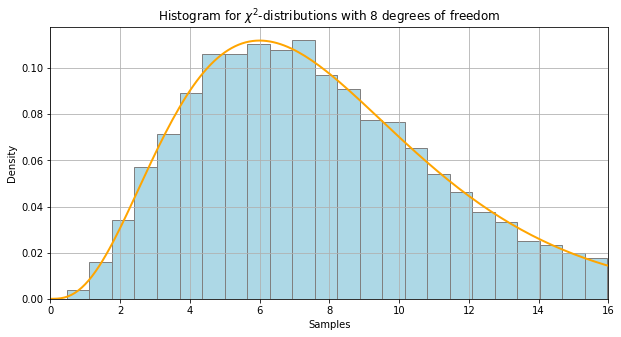

In [15]:
# 3
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

samples = chi2.rvs(df=8, size=10000, random_state=1)
plt.figure(figsize=(10, 5))
plt.hist(
    samples,
    density=True,
    color="lightblue",
    edgecolor="grey",
    bins="scott",
)

plt.title("Histogram for $\chi^2$-distributions with 8 degrees of freedom")

plt.plot(
    np.arange(0, 20, 0.1),
    chi2.pdf(np.arange(0, 20, 0.1), df=8),
    "-",
    linewidth=2,
    color="orange",
)
plt.xlabel("Samples")
plt.ylabel("Density")
plt.grid()
plt.xlim(0, 16)
plt.show()

4.We say that $\hat{\sigma}^2$ is an unbiased estimate of the population variance if $\mathbb{E}[\hat{\sigma}^2] = \sigma^2$, where $\sigma^2$ is the population variance. We have $\frac{\frac{S_x^2}{\sigma_x^2}}{\frac{S_y^2}{\sigma_y^2}}$ follows $F$ distribution with degree of freedom 7 and 5. We set $H_0: \sigma_x=\sigma_y$ and $H_1:\sigma_x\neq\sigma_y$. Under $H_0$, we can calculate the $F$ statistics as $f = \frac{S_x^2}{S_y^2} = \frac{14.22}{19.11} = 0.7441$. The two-sided critical region corresponding to 5% confidence level is (0,0.1892)$\cup$(6.8531,$+\infty$). So we cannot reject the null hypothesis.

In [41]:
# 5.
import numpy as np
import matplotlib.pyplot as plt

class OLS:
    def __init__(self, T, N, beta, sigma,x):
        self.T = T
        self.N = N
        self.beta = beta
        self.sigma = sigma
        self.x = x 

    def linmodel(self):  # return y
        return np.matmul(self.x, self.beta) + np.random.normal(0, self.sigma, size=(self.T, 1))

    def fit(self):  # return estimated beta
        y = self.linmodel()
        return np.matmul(np.matmul(np.linalg.inv(np.matmul(self.x.T, self.x)), self.x.T), y)
    
    def scatter(self):
        y_hat = np.matmul(self.x,self.fit())
        y = self.linmodel()
        plt.scatter(y, y_hat,c="b",alpha=0.5,s=0.3)
        plt.show()

        
beta = np.array([0.01, 0.1, 1]).reshape(-1,1)
T = 1000
N = 3
x = np.random.normal(size=(T, N))
for i in range(3):
    sigma = 10 ** (-i)
    ols = OLS(T, N, beta, sigma,x)
    print(ols.fit())    

[[-0.00364173]
 [ 0.10210135]
 [ 0.94635657]]
[[0.00199802]
 [0.10146933]
 [1.00224933]]
[[0.01016817]
 [0.10001898]
 [0.99978528]]


(e) As $\sigma$ increases, the noise in my estimator also increases. This is because $\mathrm{var}[\hat{\beta}|X] = (X'X)^{-1}\sigma^2$, the variance of $\hat{\beta}$ increases when $\sigma$ increases.

(f) The standard deviation of $\beta_i$ is $\sqrt{c_{ii}}$, where $c_{ii}$ is the $i^{th}$ diagonal element of $(X'X)^{-1}\sigma^2$.

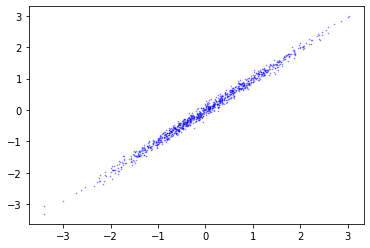

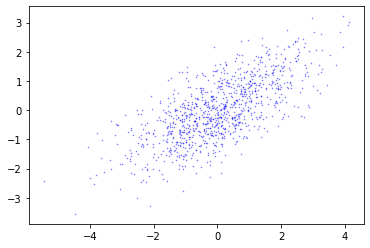

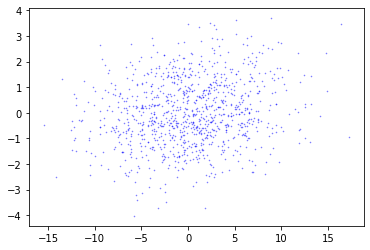

In [42]:
# (g)
ols1 = OLS(T, N, beta, 0.1, x)
ols1.scatter()
ols2 = OLS(T, N, beta, 1, x)
ols2.scatter()
ols3 = OLS(T, N, beta, 5, x)
ols3.scatter()

(g) (ii) As we can see from the plots, as sigma increases, the scatter points deviates more from the line y=x ($\mathbb{E}[y] = \mathbb{E}[\hat{y}]=X\beta$), since as sigma increases, the variance of $\hat{y}$ increases: $\hat{y}\sim N(X\beta,X(X'X)^{-1}X'\sigma^2)$.

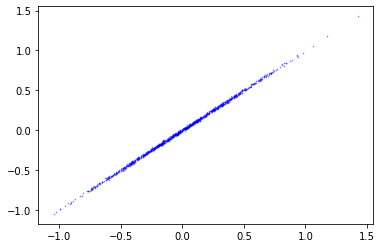

In [50]:
# (h) 
def interactive_plot(beta_1,beta_2,beta_3,sigma):
    beta = np.array([beta_1,beta_2,beta_3]).reshape(-1,1)
    x = np.random.normal(size=(1000, 3))
    y = np.matmul(x, beta) + np.random.normal(0, sigma, size=(1000, 1))
    y_hat = np.matmul(x, np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y))
    plt.scatter(y, y_hat,c="b", alpha=0.5, s=0.3)
    plt.show()


interactive_plot(0.1,0.2,0.3,0.01)

6.(a)We know that $P = X(X'X)^{-1}X'$. Since $P'=X((X'X)^{-1})'X'=X(X'X)^{-1}X'$, we know that P is symmetric. Given a vector $y$, we can find the projection of $y$ on $\mathcal{R}(X)$ as follows: we assume the projection in $\mathcal{R}(X)$ is $X\theta$, then $y-X\theta$ should be perpendicular to $\mathcal{R}(X)$. That is, $y-X\theta$ belongs to $\mathcal{Nul}(X')$. Therefore, $X'(y-X\theta) = 0$, $\theta=(X'X)^{-1}X'y$ and the projection is $X(X'X)^{-1}X'y = Py$. To show that P is onto, given any $\theta$ such that $X\theta \in \mathcal{R}(X)$, we can always find $y = X\theta \in \mathcal{R}^n$ such that $Py = X(X'X)^{-1}X'X\theta = X\theta$. 

Also note that P is idempotent ($P^2 =P$) <--> $P$ is a projection matrix. $P$ orthogomal projection <--> $P$ symmetric.
$(y-Py,Py) = 0 = ((I-P)y)'Py = y'(I-P')Py$ for all $y$. So $P-P'P=0=P'-P'P$, and further we have $P'=P$.

(b)$R^2$ cannot be negative since $R^2 = \frac{SSE}{SST} = \frac{\sum(\hat{y_i}-\bar{y})^2}{\sum(y_i-\bar{y})^2} \geq 0$.

(c)We write $\beta = [\beta_1, \beta_2...\beta_n]'$ and $A=A'=[a_{ij}]$. Then $\beta'A\beta = \beta_1\sum a_{1i}\beta_i+\beta_2\sum a_{2i}\beta_i+...+\beta_n\sum a_{ni}\beta_i$. So $\frac{\partial \beta'A\beta}{\partial\beta_k} = \sum a_{ki}\beta_i+\beta_ka_{kk}+\sum_{j\neq k}\beta_ja_{jk} = \sum a_{ki}\beta_i+\sum\beta_ja_{jk} = 2\sum a_{ki}\beta_i$. Hence, we have $\nabla_{\beta}\beta'A\beta = 2A\beta$.

(d) Random regressors treat regressors as random variables while fixed regressors are treated as deterministic values. With fixed regressors it is easy to miss the importance of the error terms being uncorrelated with current, past, and future regressors. Additionally, with fixed regressors the distinction between the unconditional and conditional homoskedasticity is lost.

7.(a) Suppose $X \in R^{n\times p}$. The statement that $s^2 = \frac{u'u}{n-p}$ ($u$ is the residual) is the unbiased estimator of $\sigma^2$ is valid under the following assumptions: 
1. Linearity: $y = X\beta + \epsilon$
2. Strict Exogeneity:$\mathbb{E}[\epsilon|X] = 0$
3. X has full rank
4. Spherical Errors: $\mathrm{var}[\epsilon|X] = \sigma^2I_n$

$\mathbb{E}[u'u] = \mathbb{E}[((I-P)y)'(I-P)y] = \mathbb{E}[y'(I-P)'(I-P)y] = \mathbb{E}[y'(I-P)y] = \mathbb{E}{[(\beta'X'+\epsilon')(I-P)(X\beta+\epsilon)]}=\mathbb{E}[\beta'X'(I-P)X\beta+\beta'X'(I-P)\epsilon+\epsilon'(I-P)X\beta+\epsilon'(I-P)\epsilon].$
Since $(I-P)X=X-X(X'X)^{-1}X'X=0$, we have $\mathbb{E}[u'u]= \mathbb{E}[\beta'X'(I-P)\epsilon +\epsilon'(I-P)\epsilon] =\mathbb{E}[(\epsilon'(I-P)X\beta)'+\epsilon'(I-P)\epsilon] = \mathbb{E}[\epsilon'(I-P)\epsilon] = \mathbb{E}[tr(\epsilon'(I-P)\epsilon)] = \mathbb{E}[tr((I-P)\epsilon\epsilon'] = tr((I-P)\mathbb{E}[\epsilon\epsilon'])= \sigma^2(n-rank(P)) = \sigma^2(n-p).$ Done.

(b) Under the above assumptions 1~4. $\mathrm{var}[\hat{\beta}|X] = \mathrm{var}[(X'X)^{-1}Xy|X]= \mathrm{var}[(X'X)^{-1}X(X\beta+\epsilon)|X] = \mathrm{var}[\beta+((X'X)^{-1}X\epsilon)|X] = \mathrm{var}[(X'X)^{-1}X\epsilon|X] =   (X'X)^{-1}X'\mathrm{var}[\epsilon|X]X(X'X)^{-1} =(X'X)^{-1}\sigma^2. $

(c)$Cov[\hat{\beta},r|X] = Cov[(X'X)^{-1}X'y, (I-P)y|X] = (X'X)^{-1}X'Cov(y|X)(I-P) = \sigma^2[(X'X)^{-1}X'-(X'X)^{-1}X'P] = \sigma^2[(X'X)^{-1}X'-(X'X)^{-1}X'X(X'X)^{-1}X')] = 0$